In [1]:
import yaml
import awkward as aw
import uproot
import hist
import math
import numpy as np
from scipy.stats import kstest
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from IPython.display import Audio
from matplotlib.offsetbox import AnchoredText

from util import * 

import random
import time

import seaborn as sns
import matplotlib.pyplot as plt
import cloudpickle

from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay,  classification_report


from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb


In [2]:
datasets = ['frvz_ggf_508885', 'frvz_ggf_508886', 'frvz_ggf_508887', 'frvz_ggf_508888', 'frvz_ggf_508889', 'frvz_ggf_508890', 'frvz_ggf_508891',
            'frvz_ggf_508892', 'frvz_ggf_508893', 'frvz_vbf_500757_02-00', 'frvz_vbf_500757_02-00', 'frvz_vbf_500758_02-00',
            'frvz_vbf_500759_02-00', 'frvz_vbf_500760_02-00', 'frvz_vbf_500761_02-00', 'frvz_vbf_500762_02-00', 'frvz_vbf_500763_02-00', 'frvz_vbf_500764_02-00']

BDT_inputs = ['mjj', "dphijj", "detajj",
              'MET',
              'jet1_pt',
              'jet1_eta',
              'jet1_e',
              'jet2_pt',
              'jet2_eta',
              'jet2_e',
                "njet30", 
            #  "centrality"
            'intLumi',
            'scale1fb'
             ]

df = read_data(datasets = datasets, variables=BDT_inputs, carpeta='C:/Users/jav90/Desktop/dpj/production_analysis/analisis_javier/Samples/') #de archivo util.py 
df

frvz_ggf_508885
frvz_ggf_508886
frvz_ggf_508887
frvz_ggf_508888
frvz_ggf_508889
frvz_ggf_508890
frvz_ggf_508891
frvz_ggf_508892
frvz_ggf_508893
frvz_vbf_500757_02-00
frvz_vbf_500757_02-00
frvz_vbf_500758_02-00
frvz_vbf_500759_02-00
frvz_vbf_500760_02-00
frvz_vbf_500761_02-00
frvz_vbf_500762_02-00
frvz_vbf_500763_02-00
frvz_vbf_500764_02-00


,mjj,dphijj,detajj,MET,jet1_pt,jet1_eta,jet1_e,jet2_pt,jet2_eta,jet2_e,njet30,intLumi,scale1fb,weights,tipo
0,1.635499e+05,-2.570451,0.501867,74265.851562,128728.367188,-1.605733,3.337677e+05,52183.613281,-1.103866,8.745945e+04,4,36.099998,0.047943,1.730729,ggf
1,2.156652e+05,2.615153,2.573857,9079.842773,62673.781250,0.385422,6.801921e+04,48930.621094,2.959279,4.731216e+05,2,36.099998,0.033863,1.222444,ggf
2,-9.990000e+02,-999.000000,-999.000000,23493.593750,39789.089844,-1.226331,7.379085e+04,-999.000000,-999.000000,-9.990000e+02,1,36.099998,0.041334,1.492153,ggf
3,-9.990000e+02,-999.000000,-999.000000,15051.750000,30304.716797,-0.541434,3.554019e+04,-999.000000,-999.000000,-9.990000e+02,1,36.099998,0.047489,1.714360,ggf
4,-9.990000e+02,-999.000000,-999.000000,7429.219727,-999.000000,-999.000000,-9.990000e+02,-999.000000,-999.000000,-9.990000e+02,0,36.099998,0.042143,1.521348,ggf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687595,1.367926e+06,0.648911,4.957650,216401.265625,116440.851562,-3.211884,1.447791e+06,114172.210938,1.745765,3.373078e+05,2,36.099998,0.000256,0.009256,vbf
4687596,1.540464e+06,-0.568785,5.033163,191440.421875,134930.218750,3.088001,1.482836e+06,115863.156250,-1.945162,4.136839e+05,3,36.099998,0.000305,0.011002,vbf
4687597,1.694813e+06,-2.918931,5.825066,35132.878906,110081.000000,3.609008,2.034103e+06,76587.546875,-2.216058,3.554840e+05,2,1.000000,0.000271,0.000271,vbf
4687598,7.387971e+05,0.789625,5.037199,97912.656250,105132.671875,-0.351721,1.122496e+05,33879.730469,4.685478,1.835801e+06,3,36.099998,0.000282,0.010165,vbf


c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jav90\envs\dpj_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


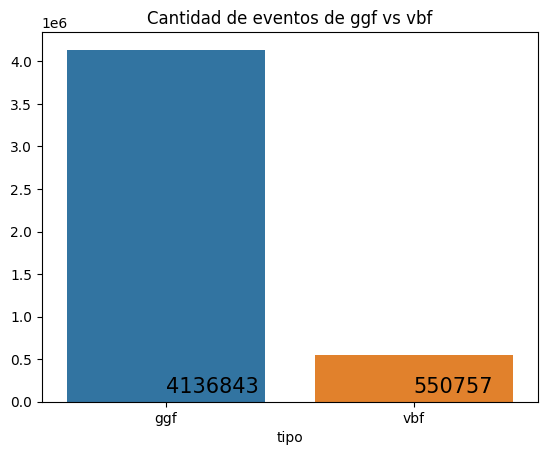

In [3]:
sns.barplot(x=df['tipo'].value_counts().index, y=df['tipo'].value_counts().values)
plt.title('Cantidad de eventos de ggf vs vbf')
plt.text(0, 100000, df['tipo'].value_counts().values[0], fontsize=15)
plt.text(1, 100000, df['tipo'].value_counts().values[1], fontsize=15)
plt.show()  

Se crea una columnas llamada 'tipo' la cual sirve para identificar si el evento corresponde a un evento de vbf o ggf.
Luego, a partir de esta columna se crea otra dummy para poder usarlo como vector objetivo.


In [4]:
df1 = df.copy()
df1 = df1[df1['weights'] > 0] #eliminar weights negativos y ceros
df1['VBF label'] = df1['tipo'].apply(lambda x: 1 if x == 'vbf' else 0) #crear columna con 1 para vbf y 0 para ggf

ml_var = ['mjj', "dphijj", "detajj", 'MET',
              'jet1_pt',
              'jet1_eta',
              'jet1_e',
              'jet2_pt',
              'jet2_eta',
              'jet2_e',]

X_ggf = df1[df1['tipo'] == 'ggf']
print("Cantidad de eventos de MC de ggF: ", X_ggf.shape)
X_ggf = X_ggf[X_ggf['njet30'] >1] # Se consideran eventos de ggF con al menos 2 jets.
print("Cantidad de eventos de MC de ggF luego de corte njet30:", X_ggf.shape)
# X_ggf_1_0_jet = X_ggf[X_ggf['njet30'] < 2]
X_vbf = df1[df1['tipo'] == 'vbf']

X_ggf_vbf = pd.concat([X_ggf, X_vbf], axis=0)

Cantidad de eventos de MC de ggF:  (4066726, 16)
Cantidad de eventos de MC de ggF luego de corte njet30: (1479158, 16)


In [7]:
X_vbf.shape
# X_vbf[X_vbf['njet30'] <2].shape

(549329, 16)

In [8]:
df.shape

(4687600, 15)

In [9]:
print(X_vbf.shape)
print(X_ggf.shape)

(549329, 16)
(1479158, 16)


In [11]:
print(X_ggf_vbf.shape)
X_ggf_vbf

(2028487, 16)


,mjj,dphijj,detajj,MET,jet1_pt,jet1_eta,jet1_e,jet2_pt,jet2_eta,jet2_e,njet30,intLumi,scale1fb,weights,tipo,VBF label
0,1.635499e+05,-2.570451,0.501867,74265.851562,128728.367188,-1.605733,3.337677e+05,52183.613281,-1.103866,8.745945e+04,4,36.099998,0.047943,1.730729,ggf,0
1,2.156652e+05,2.615153,2.573857,9079.842773,62673.781250,0.385422,6.801921e+04,48930.621094,2.959279,4.731216e+05,2,36.099998,0.033863,1.222444,ggf,0
6,8.857312e+04,2.589460,0.205449,21054.619141,49060.359375,1.618547,1.286644e+05,42441.085938,1.413098,9.242984e+04,2,36.099998,0.041855,1.510958,ggf,0
8,8.275173e+05,1.557742,6.259869,20346.527344,38408.460938,-2.073033,1.551958e+05,34065.480469,4.186836,1.121255e+06,3,36.099998,0.045243,1.633280,ggf,0
16,1.210085e+05,-2.690945,1.826837,8163.573730,49826.101562,0.369272,5.345486e+04,35819.777344,-1.457565,8.110114e+04,2,36.099998,0.039910,1.440744,ggf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687595,1.367926e+06,0.648911,4.957650,216401.265625,116440.851562,-3.211884,1.447791e+06,114172.210938,1.745765,3.373078e+05,2,36.099998,0.000256,0.009256,vbf,1
4687596,1.540464e+06,-0.568785,5.033163,191440.421875,134930.218750,3.088001,1.482836e+06,115863.156250,-1.945162,4.136839e+05,3,36.099998,0.000305,0.011002,vbf,1
4687597,1.694813e+06,-2.918931,5.825066,35132.878906,110081.000000,3.609008,2.034103e+06,76587.546875,-2.216058,3.554840e+05,2,1.000000,0.000271,0.000271,vbf,1
4687598,7.387971e+05,0.789625,5.037199,97912.656250,105132.671875,-0.351721,1.122496e+05,33879.730469,4.685478,1.835801e+06,3,36.099998,0.000282,0.010165,vbf,1


In [8]:
X_ggf_vbf['VBF prediction str'] = X_ggf_vbf.apply(lambda row: 'vbf' if (row['mjj'] > 225000) and (row['MET'] > 225000) else 'ggf', axis=1)
X_ggf_vbf['VBF prediction'] = X_ggf_vbf["VBF prediction str"].apply(lambda x: 1 if x == 'vbf' else 0)

In [9]:
# X_result_vbf['Resultado'] = 'vbf'
# X_result_ggf['Resultado'] = 'ggf'

# X_result_vbf['Resultado clase'] = 'vbf'
# X_result_ggf['Resultado clase'] = 'ggf'

# df_resultado = pd.concat([X_result_vbf, X_result_ggf], axis=0)
# df_resultado['Resultado clase'] = df_resultado['Resultado'].apply(lambda x: 1 if x == 'vbf' else 0)


In [10]:
X_ggf_vbf

,mjj,dphijj,detajj,MET,jet1_pt,jet1_eta,jet1_e,jet2_pt,jet2_eta,jet2_e,njet30,intLumi,scale1fb,weights,tipo,VBF label,VBF prediction str,VBF prediction
0,1.635499e+05,-2.570451,0.501867,74265.851562,128728.367188,-1.605733,3.337677e+05,52183.613281,-1.103866,8.745945e+04,4,36.099998,0.047943,1.730729,ggf,0,ggf,0
1,2.156652e+05,2.615153,2.573857,9079.842773,62673.781250,0.385422,6.801921e+04,48930.621094,2.959279,4.731216e+05,2,36.099998,0.033863,1.222444,ggf,0,ggf,0
6,8.857312e+04,2.589460,0.205449,21054.619141,49060.359375,1.618547,1.286644e+05,42441.085938,1.413098,9.242984e+04,2,36.099998,0.041855,1.510958,ggf,0,ggf,0
8,8.275173e+05,1.557742,6.259869,20346.527344,38408.460938,-2.073033,1.551958e+05,34065.480469,4.186836,1.121255e+06,3,36.099998,0.045243,1.633280,ggf,0,ggf,0
16,1.210085e+05,-2.690945,1.826837,8163.573730,49826.101562,0.369272,5.345486e+04,35819.777344,-1.457565,8.110114e+04,2,36.099998,0.039910,1.440744,ggf,0,ggf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687595,1.367926e+06,0.648911,4.957650,216401.265625,116440.851562,-3.211884,1.447791e+06,114172.210938,1.745765,3.373078e+05,2,36.099998,0.000256,0.009256,vbf,1,ggf,0
4687596,1.540464e+06,-0.568785,5.033163,191440.421875,134930.218750,3.088001,1.482836e+06,115863.156250,-1.945162,4.136839e+05,3,36.099998,0.000305,0.011002,vbf,1,ggf,0
4687597,1.694813e+06,-2.918931,5.825066,35132.878906,110081.000000,3.609008,2.034103e+06,76587.546875,-2.216058,3.554840e+05,2,1.000000,0.000271,0.000271,vbf,1,ggf,0
4687598,7.387971e+05,0.789625,5.037199,97912.656250,105132.671875,-0.351721,1.122496e+05,33879.730469,4.685478,1.835801e+06,3,36.099998,0.000282,0.010165,vbf,1,ggf,0


c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_exten

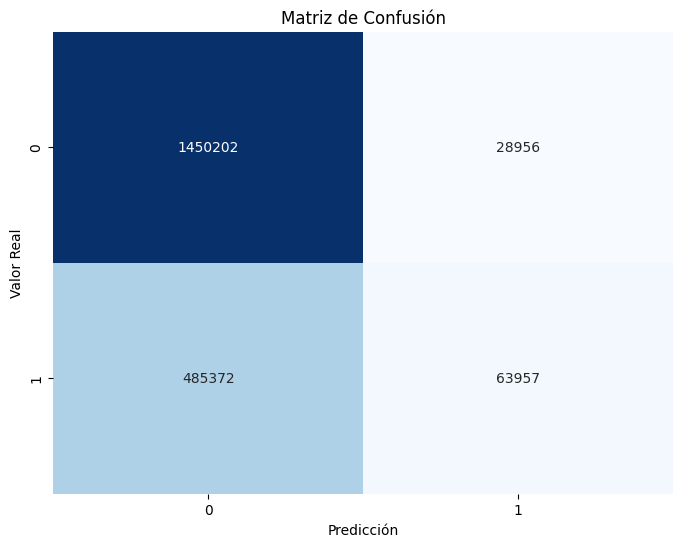

In [11]:
cm = confusion_matrix(X_ggf_vbf['VBF label'], X_ggf_vbf['VBF prediction'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [12]:
print(classification_report(X_ggf_vbf['clase'], X_ggf_vbf['VBF prediction']))

KeyError: 'clase'

In [ ]:
cm[1][1]/(cm[1][0]+cm[1][1])

0.11642749609068519

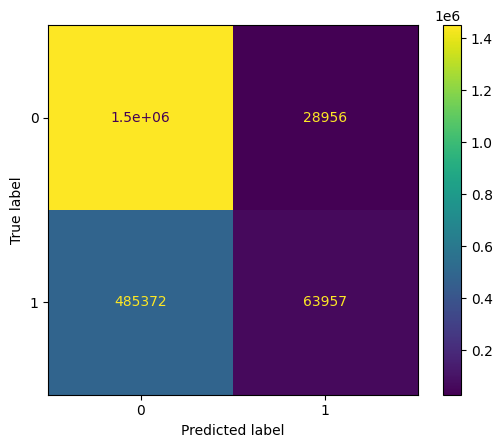

In [ ]:
ConfusionMatrixDisplay(cm).plot()

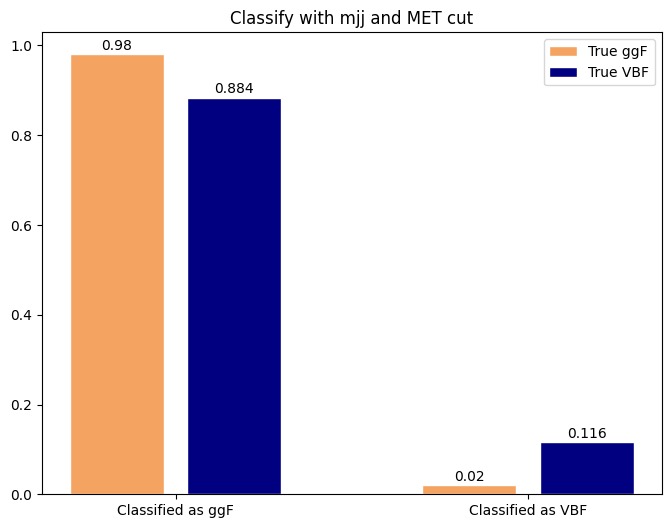

In [ ]:



ggf_as_ggf = cm[0,0]
ggf_as_vbf = cm[0,1]
vbf_as_ggf = cm[1,0]
vbf_as_vbf = cm[1,1]
bars1 = np.array([ggf_as_ggf, ggf_as_vbf]) / (ggf_as_ggf+ggf_as_vbf)#+df2_not_used[df2_not_used['tipo'] == 'ggf'].shape[0])
bars2 = np.array([vbf_as_ggf, vbf_as_vbf]) / (vbf_as_ggf+vbf_as_vbf)#+df2_not_used[df2_not_used['tipo'] == 'vbf'].shape[0])
pos1 = [0,3]
pos2 = [1,4]
plt.figure(figsize=(8, 6))
plt.bar(pos1, bars1, width=.8, color='sandybrown', edgecolor='white', label='True ggF')
plt.bar(pos2, bars2, width=.8, color="navy", edgecolor='white', label='True VBF')
plt.xticks([.5,3.5] ,['Classified as ggF','Classified as VBF'])

for i in range(2):
     plt.text(pos1[i], bars1[i] + 0.01, str(round(bars1[i],3)), ha='center')
     plt.text(pos2[i], bars2[i] + 0.01, str(round(bars2[i],3)), ha='center')
plt.title("Classify with mjj and MET cut")
plt.legend()

c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jav90\envs\dpj_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_exten

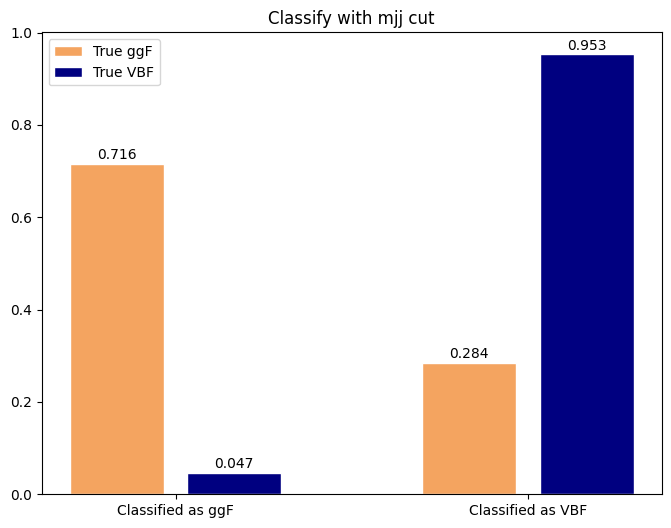

In [ ]:
df2 = df.copy()
df2['VBF label'] = df2['tipo'].apply(lambda x: 1 if x == 'vbf' else 0)

ml_var = ['mjj', "dphijj", "detajj", 'MET',
              'jet1_pt',
              'jet1_eta',
              'jet1_e',
              'jet2_pt',
              'jet2_eta',
              'jet2_e',]

# df2_not_used = df2[df2['njet30'] <= 1]

# df2 = df2[ df2['njet30'] > 1]
X_ggf = df2[df2['tipo'] == 'ggf']
X_ggf = X_ggf[X_ggf['njet30'] >1]
X_ggf_1_0_jet = X_ggf[X_ggf['njet30'] < 2]
X_vbf = df2[df2['tipo'] == 'vbf']

X_ggf_vbf['VBF prediction str'] = X_ggf_vbf.apply(lambda row: 'vbf' if (row['mjj'] > 225000) else 'ggf', axis=1)
X_ggf_vbf['VBF prediction'] = X_ggf_vbf["VBF prediction str"].apply(lambda x: 1 if x == 'vbf' else 0)

cm = confusion_matrix(X_ggf_vbf['VBF label'], X_ggf_vbf['VBF prediction'])


ggf_as_ggf = cm[0,0]
ggf_as_vbf = cm[0,1]
vbf_as_ggf = cm[1,0]
vbf_as_vbf = cm[1,1]
bars1 = np.array([ggf_as_ggf, ggf_as_vbf]) / (ggf_as_ggf+ggf_as_vbf)#+df2_not_used[df2_not_used['tipo'] == 'ggf'].shape[0])
bars2 = np.array([vbf_as_ggf, vbf_as_vbf]) / (vbf_as_ggf+vbf_as_vbf)#+df2_not_used[df2_not_used['tipo'] == 'vbf'].shape[0])
pos1 = [0,3]
pos2 = [1,4]
plt.figure(figsize=(8, 6))
plt.bar(pos1, bars1, width=.8, color='sandybrown', edgecolor='white', label='True ggF')
plt.bar(pos2, bars2, width=.8, color="navy", edgecolor='white', label='True VBF')
plt.xticks([.5,3.5] ,['Classified as ggF','Classified as VBF'])

for i in range(2):
     plt.text(pos1[i], bars1[i] + 0.01, str(round(bars1[i],3)), ha='center')
     plt.text(pos2[i], bars2[i] + 0.01, str(round(bars2[i],3)), ha='center')
plt.title("Classify with mjj cut")
plt.legend()